In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv(r'diabetes.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

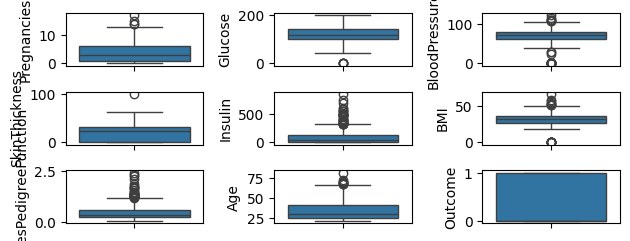

In [8]:
numerical_cols = df.select_dtypes(include="number").columns

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [9]:
outlier_cols = ["Pregnancies", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 -1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[outlier_cols] = np.where(df[outlier_cols] < lower_bound, lower_bound,
                           np.where(df[outlier_cols] > upper_bound, upper_bound,
                                   df[outlier_cols]))

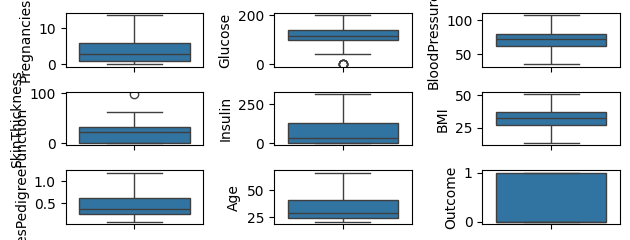

In [10]:
numerical_cols = df.select_dtypes(include="number").columns

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

<Axes: >

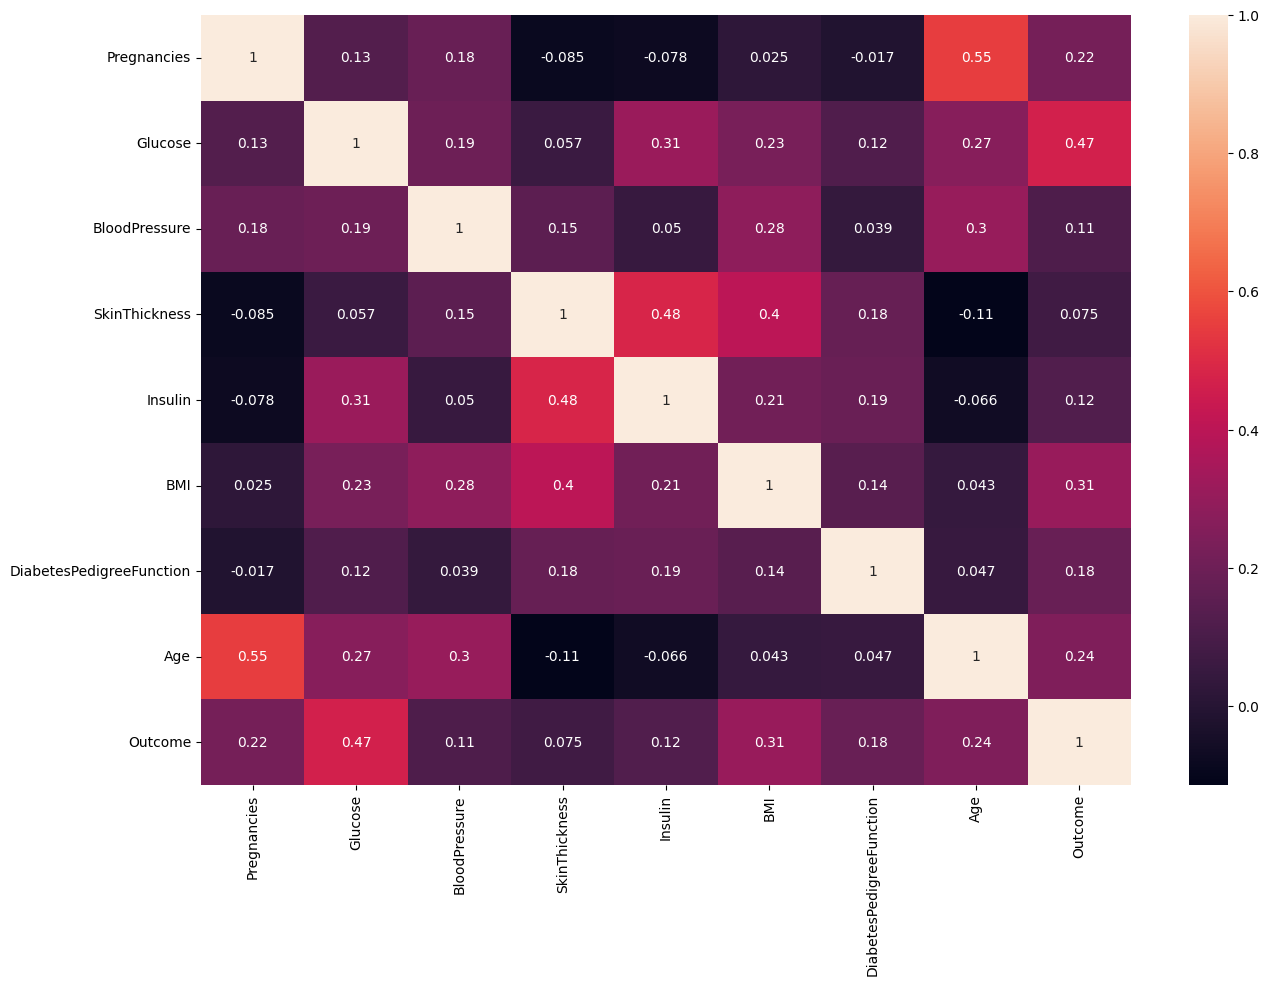

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = ["Glucose", "BMI", "Pregnancies", "Age"]
x = df[features]
y = df["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [17]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.734375


In [18]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7395833333333334


In [21]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6979166666666666
